In [111]:
## Import packages needed for this script 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load arrays
path='/Users/aazeez/Documents/Personal/erdosbootcamp/Project'

data_array = np.load(path+'/data_array.npy') 
label_array= np.load(path+'/label_array.npy')
group_array= np.load(path+'/group_array.npy')

print(data_array.shape, label_array.shape, group_array.shape)

(600, 65, 256) (600,) (600,)


In [4]:
from scipy import stats 

def mean(x):
    return np.mean(x, axis=-1)
def std(x):
    return np.std(x, axis=-1)
def ptp(x):
    return np.ptp(x, axis=-1)
def var(x):
    return np.var(x, axis=-1)
def minim(x):
    return np.min(x, axis=-1)
def maxim(x):
    return np.max(x, axis=-1)
def argminim(x):
    return np.argmin(x, axis=-1)
def argmaxim(x):
    return np.argmax(x, axis=-1)
def rms(x):
    return np.sqrt(np.mean(x**2, axis=-1))
def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x, axis=-1)), axis=-1)
def skewness(x):
    return stats.skew(x, axis=-1)
def kurtosis(x):
    return stats.kurtosis(x, axis=-1)

def concatenate_features(x):
    return np.concatenate((mean(x), std(x), ptp(x), var(x), minim(x), maxim(x),
                          argminim(x), argmaxim(x), rms(x), abs_diff_signal(x),
                          skewness(x), kurtosis(x)), axis=-1)

In [5]:
features = []

for d in data_array:
    features.append(concatenate_features(d))

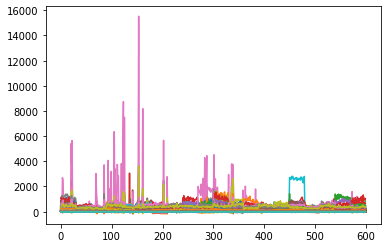

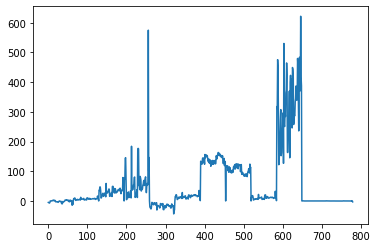

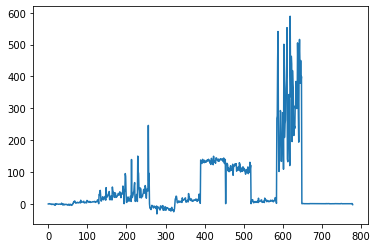

600

In [154]:
features_array=np.array(features)
features_array.shape
plt.plot(features_array)
plt.show()
crt_features_channel= features_array[0:300:1,:].mean(axis=0)
plt.plot(crt_features_channel)
plt.show()
alc_features_channel= features_array[300:600:1,:].mean(axis=0)
plt.plot(alc_features_channel)
plt.show()
len(features)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, GridSearchCV

In [8]:
## Logistic Regression

In [110]:
clf = LogisticRegression()
gkf = GroupKFold(5)
pipe= Pipeline([('scaler',StandardScaler()), ('clf',clf)])
pg=np.arange(0,1,0.0001).tolist()

# param_grid = {'clf__C':[0.0001,0.001,0.01, 0.1, 0.5, 0.7, 1, 3, 5, 7]} 
param_grid = {'clf__C':pg} 

gscv=GridSearchCV(pipe, param_grid, cv=gkf, n_jobs=5)
gscv.fit(features_array, label_array, groups=group_array)

/Users/aazeez/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.655      0.66166667 ... 0.56       0.56       0.56      ]
  category=UserWarning


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             n_jobs=5,
             param_grid={'clf__C': [0.0, 0.0001, 0.0002, 0.00030000000000000003,
                                    0.0004, 0.0005, 0.0006000000000000001,
                                    0.0007, 0.0008, 0.0009000000000000001,
                                    0.001, 0.0011, 0.0012000000000000001,
                                    0.0013000000000000002, 0.0014, 0.0015,
                                    0.0016, 0.0017000000000000001,
                                    0.0018000000000000002, 0.0019, 0.002,
                                    0.0021000000000000003, 0.0022, 0.0023,
                                    0.0024000000000000002, 0.0025,
                                    0.0026000000000000003, 0.0027, 0.0028,
                                    0.0029000000000000002,

In [73]:
# gscv.cv_results_

{'mean_fit_time': array([0.02720232, 0.08414259, 0.0978159 , 0.0945982 , 0.09478683,
        0.10281329, 0.10026765, 0.0835464 , 0.09009914, 0.08734417,
        0.10113745, 0.10232229, 0.1087626 , 0.10800419, 0.11451621,
        0.11526527, 0.11696749, 0.12020984, 0.12117867, 0.11478572,
        0.104774  , 0.1082479 , 0.10376863, 0.10816579, 0.10160146,
        0.10209403, 0.10387244, 0.09930825, 0.09829426, 0.10048738,
        0.11073427, 0.11993771, 0.10603704, 0.10737948, 0.10726862,
        0.11166301, 0.11742435, 0.11782141, 0.11715131, 0.11055784,
        0.11220937, 0.11834579, 0.10799294, 0.10922437, 0.11081424,
        0.10865922, 0.11636658, 0.11384182, 0.11067634, 0.11192961,
        0.16081042, 0.14262357, 0.1226213 , 0.12193961, 0.10997701,
        0.12125006, 0.12519903, 0.13109651, 0.12302923, 0.13233938,
        0.11988635, 0.13464341, 0.13320699, 0.13097639, 0.12534542,
        0.12163405, 0.1226203 , 0.14528141, 0.16141295, 0.1228847 ,
        0.11332989, 0.11326904,

In [112]:
gscv.best_params_

{'clf__C': 0.0004}

In [113]:
gscv.best_score_

0.665

In [114]:
df_gscv=pd.DataFrame.from_dict(gscv.cv_results_)
df_gscv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023663,0.000544,0.000000,0.000000,0.0000,{'clf__C': 0.0},NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000
1,0.045565,0.000920,0.002457,0.000241,0.0001,{'clf__C': 0.0001},0.575000,0.850000,0.875000,0.433333,0.541667,0.655000,0.175958,11
2,0.044611,0.000801,0.001641,0.000132,0.0002,{'clf__C': 0.0002},0.533333,0.900000,0.875000,0.441667,0.558333,0.661667,0.188606,6
3,0.044835,0.001267,0.001685,0.000155,0.0003,{'clf__C': 0.00030000000000000003},0.516667,0.916667,0.883333,0.441667,0.558333,0.663333,0.197104,3
4,0.051409,0.000488,0.001620,0.000145,0.0004,{'clf__C': 0.0004},0.500000,0.925000,0.891667,0.466667,0.541667,0.665000,0.200375,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.118741,0.007926,0.001743,0.000338,0.9995,{'clf__C': 0.9995},0.425000,0.716667,0.783333,0.433333,0.441667,0.560000,0.156649,5527
9996,0.109519,0.007372,0.001660,0.000152,0.9996,{'clf__C': 0.9996},0.425000,0.716667,0.783333,0.433333,0.441667,0.560000,0.156649,5527
9997,0.109784,0.009016,0.001687,0.000323,0.9997,{'clf__C': 0.9997},0.425000,0.716667,0.783333,0.433333,0.441667,0.560000,0.156649,5527
9998,0.111074,0.009240,0.001730,0.000285,0.9998,{'clf__C': 0.9998},0.425000,0.716667,0.783333,0.433333,0.441667,0.560000,0.156649,5527


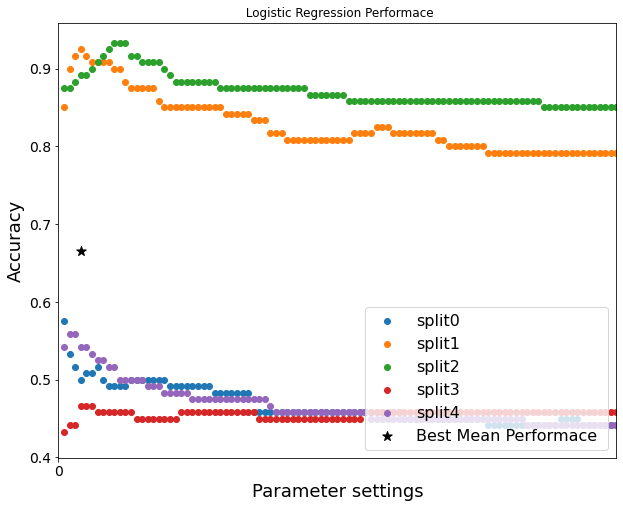

In [142]:
plt.figure(figsize=(10,8))

plt.scatter(df_gscv.param_clf__C, df_gscv.split0_test_score, label='split0')
plt.scatter(df_gscv.param_clf__C, df_gscv.split1_test_score, label='split1')
plt.scatter(df_gscv.param_clf__C, df_gscv.split2_test_score, label='split2')
plt.scatter(df_gscv.param_clf__C, df_gscv.split3_test_score, label='split3')
plt.scatter(df_gscv.param_clf__C, df_gscv.split4_test_score, label='split4')

plt.scatter(list(gscv.best_params_.values()), gscv.best_score_,  label= 'Best Mean Performace ', s=100,c='k', marker='*'  )

# plt.scatter(range(1,1001), df_gscv.split0_test_score, s=100, c='k', label='CV Training Set')

plt.xlabel("Parameter settings", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xlim(0,0.01)

plt.legend(loc=4,fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(range(0,1),fontsize=14)
plt.title(" Logistic Regression Performace")
plt.savefig('Logistic Regression Performacepng')

plt.show()

In [139]:
## Run on Test data 


[0.0004]


0.665